<a href="https://colab.research.google.com/github/MichaelSeitz98/Seminararbeit/blob/main/Inferenzanwendung_Bild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow installieren...

In [1]:
# Meine GoogleDrive mounten

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Tensorflow installieren -> Dauer: circa 1 min

!pip install tensorflow=="2.6.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564.4 MB 2.3 kB/s 
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.3.0
    Uninstalling absl-py-1.3.0:
      Successfully uninstalled absl-py-1.3.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 22.9.24
    Uninstalling flatbuffers-22.9.24:
      Successfully uninstalled flatbuffers-22.9.24
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.10.0
    Uninstalling tensorflow-2.10.0:
      Successfully uninstalled tensorflow-2.10.0
ERROR: pip's dependency resolver does not currently take

In [3]:
import os
import pathlib

# Tensorflow models repository klonen, wenn es noch nicht vorhanden ist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [4]:
# Installieren der Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Using cached avro_python3-1.10.2-py3-none-any.whl
  Using cached apache_beam-2.42.0-cp37-cp37m-manylinux2010_x86_64.whl (11.0 MB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)
  Using cached tf_models_official-2.10.0-py2.py3-none-any.whl (2.2 MB)
  Using cached tensorflow_io-0.27.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (25.0 MB)
  Using cached sacrebleu-2.2.0-py3-none-any.whl (116 kB)
  Using cached portalocker-2.6.0-py2.py3-none-any.whl (15 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Using cached tensorflow_addons-0.18.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached tensorflow-2.10.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (578.0 MB)
  Using cached opencv_python_headless-4.5.2.52-cp37-cp37m-man

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [5]:
#Tests durchlaufen lassen 
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2022-10-26 12:13:49.824628: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 12:13:50.083613: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 12:13:51.376501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-10-26 12:13:51.376791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinf

# Modell & Labelmap laden

In [6]:
# LabelMap von meinem GitHub-Account laden #TODO: Checken, ob schon vorhanden
%cd /content/

!wget https://raw.githubusercontent.com/MichaelSeitz98/Seminararbeit/main/labelmap.pbtxt


/content
--2022-10-26 12:14:46--  https://raw.githubusercontent.com/MichaelSeitz98/Seminararbeit/main/labelmap.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36 [text/plain]
Saving to: ‘labelmap.pbtxt’

labelmap.pbtxt      100%[===================>]      36  --.-KB/s    in 0s      

2022-10-26 12:14:46 (1.30 MB/s) - ‘labelmap.pbtxt’ saved [36/36]



In [30]:
model_path = '/content/drive/MyDrive/training_effDet_d0_4_3000_100/inference_graph/'
output_directory = '/content/drive/MyDrive/training_effDet_d0_4_3000_100/inference_graph'

labelmap_path = '/content/labelmap.pbtxt'
saved_model_dir = '/content/drive/MyDrive/training_effDet_d0_4_3000_100/inference_graph/saved_model'
speicherPfadEvalBilder = '/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder'

In [10]:
# Alle benötigte packages für die Inferenz impoertiert

import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [11]:
# Methode um aus Image ein Numpy_array zu machen 

def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [12]:
# Label map Category Index erzeugen
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [32]:
# Hier das Modell reinladen: TODO: als einen SavelModellPath reingeben
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'{saved_model_dir}')

print(f'trained model loaded successfully from {saved_model_dir}')

Model loaded successfully from /content/drive/MyDrive/training_effDet_d0_4_3000_100/inference_graph/saved_model


In [33]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [37]:
#Erzeugen eines neuen Ordners -> mit den richtigen geboxten Bilder 

# prüfen, ob schon ein Output-Folder für die Bilder vorhanden.
if (not os.path.isdir(speicherPfadEvalBilder)): 
    %mkdir {speicherPfadEvalBilder}
else:
    print(f'Ordner: {speicherPfadEvalBilder} existiert schon')

Ordner: /content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder existiert schon


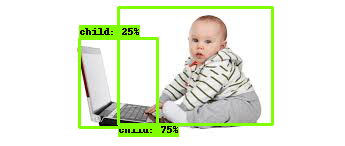

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/Download_boxed.jpg


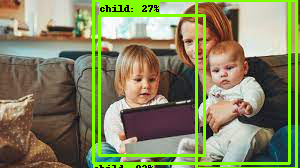

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images_boxed.jpg


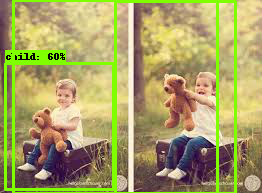

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (1)_boxed.jpg


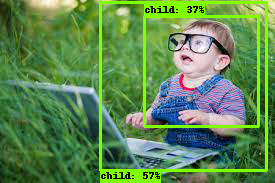

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (2)_boxed.jpg


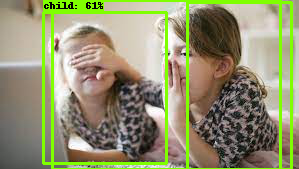

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (3)_boxed.jpg


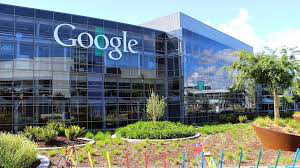

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (4)_boxed.jpg


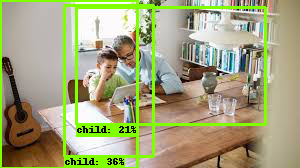

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (5)_boxed.jpg


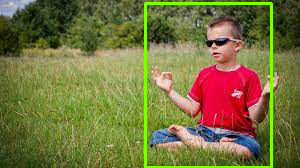

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/Download (1)_boxed.jpg


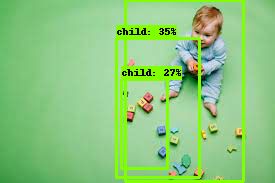

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/Download (2)_boxed.jpg


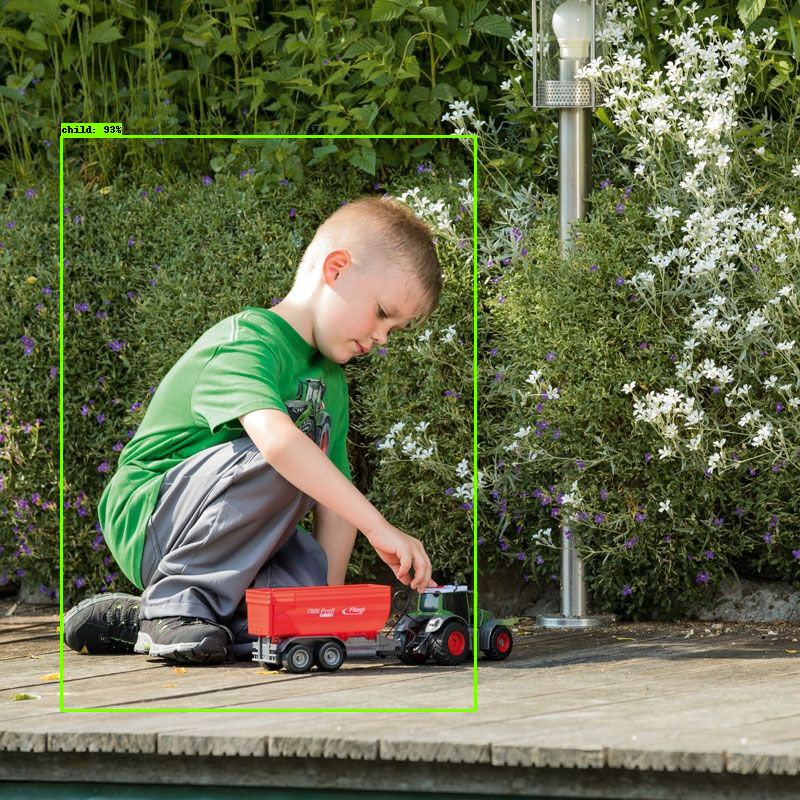

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/toy_models_boxed.jpg


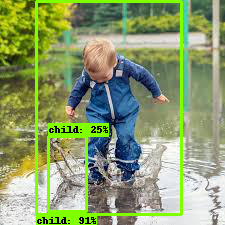

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (6)_boxed.jpg


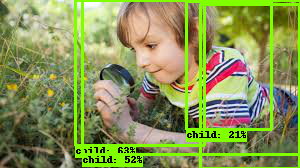

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (7)_boxed.jpg


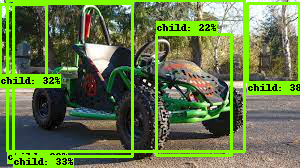

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (8)_boxed.jpg


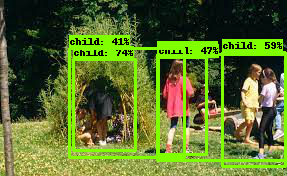

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (9)_boxed.jpg


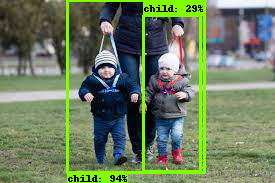

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (10)_boxed.jpg


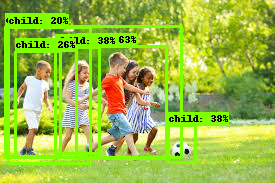

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (11)_boxed.jpg


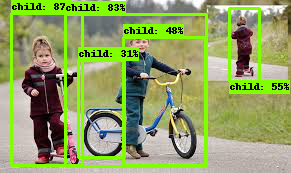

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (12)_boxed.jpg


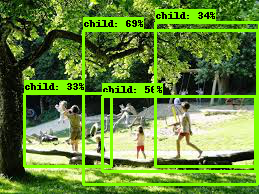

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (13)_boxed.jpg


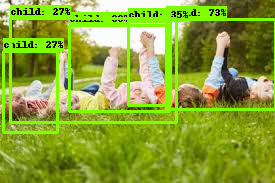

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/images (14)_boxed.jpg


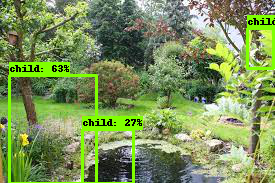

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/Download15_boxed.jpg


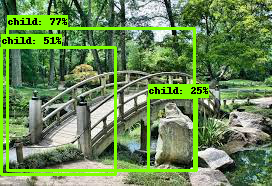

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/Download (3)_boxed.jpg


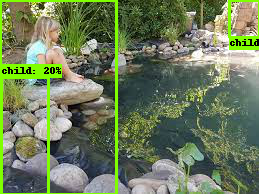

Versuche hier zu speichern:/content/drive/MyDrive/training_effDet_d0_4_3000_100/angewendeteBilder/Download_teich_boxed.jpg


In [39]:
# Ab hier geht dann die Erkennung los: für jedes testEval-Bild: 

for image_path in glob.glob('/content/drive/MyDrive/Child_Dataset/testEval/*.jpg'):

  image_name = os.path.basename(image_path).replace(".jpg", "")
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  outImg = vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      min_score_thresh=0.2,
      max_boxes_to_draw=20,
      line_thickness=3)
  
  im = Image.fromarray(outImg)
  display(Image.fromarray(image_np))
  print ('Versuche hier zu speichern:' + speicherPfadEvalBilder + "/" + image_name + "_boxed.jpg")
  im.save(speicherPfadEvalBilder + "/" + image_name + "_boxed.jpg")
